In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df_label = pd.read_csv('Label.csv',header='infer')
df_cluster = pd.read_csv('Cluster.csv',header='infer')


In [3]:
df_label.head()

,MDM,Label
0,219,1
1,265,1
2,477,1
3,573,1
4,785,1


In [4]:
df_cluster.shape

(70296, 13)

In [5]:
mdm_set = set(df_label['MDM'])

df_cluster['target'] = np.where(df_cluster['MDM Player Entity ID'].isin(mdm_set), 1, 0)

In [6]:
df_cluster['target'].value_counts()

target
0    56486
1    13810
Name: count, dtype: int64

In [7]:
df_cluster.columns

Index(['MDM Player Entity ID', 'Bet Amount', 'Paid Amount', 'Promo Amount',
       'Held Fund Bet Amount', 'Net Sales Amount', 'Token Amt',
       'Redemption Amount', 'Transaction Count', 'Login Count',
       'Registration Channel', 'Current Age', 'CasinoID', 'target'],
      dtype='object')

In [8]:
df_cluster_target = df_cluster.drop(['MDM Player Entity ID'],axis=1).loc[df_cluster['target']==1]

In [9]:
df_cluster_target.drop(['target'],axis=1,inplace=True)

In [10]:
df_cluster_target.head()

,Bet Amount,Paid Amount,Promo Amount,Held Fund Bet Amount,Net Sales Amount,Token Amt,Redemption Amount,Transaction Count,Login Count,Registration Channel,Current Age,CasinoID
24,31834.32,29358.68,136.0,2339.64,5529.20,80,136.0,3266,1,WEB,29,1
35,82.16,41.96,40.0,0.20,-0.04,0,80.0,32,25,WEB,39,1
38,165.95,108.95,57.0,0.00,10.10,0,171.0,204,460,MOBILE,45,1
39,14157.15,13712.55,350.0,94.60,2020.35,0,280.0,4916,0,WEB,35,0
43,24.15,4.15,20.0,0.00,-0.60,0,20.0,8,2,WEB,64,0


In [11]:
df_cluster_target.shape

(13810, 12)

In [12]:
# Replace 'output_file.xlsx' with the desired Excel file name
#output_file = 'target_FY23.csv'

# Export DataFrame to Excel
#df_cluster_target.to_csv(output_file, index=False)  # Set index to True if you want to include the index column

In [13]:
from matplotlib.ticker import ScalarFormatter

In [14]:
exclude_columns = ['Registration Channel', 'CasinoID']

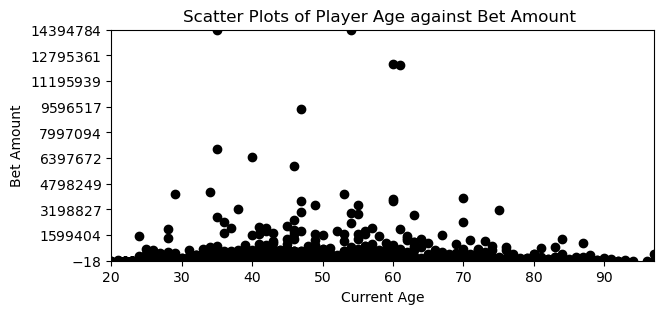

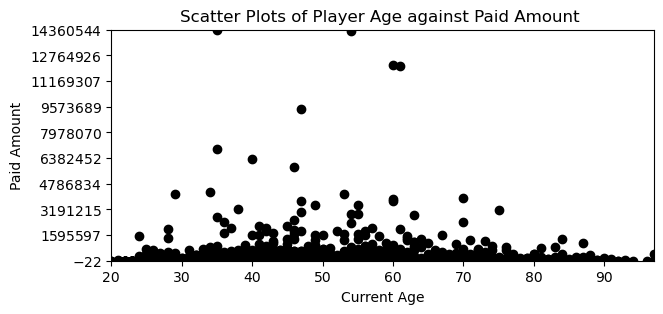

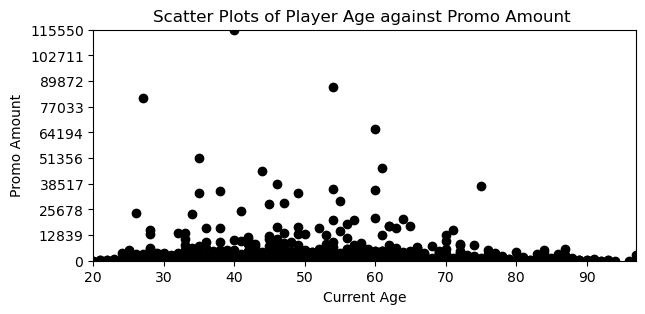

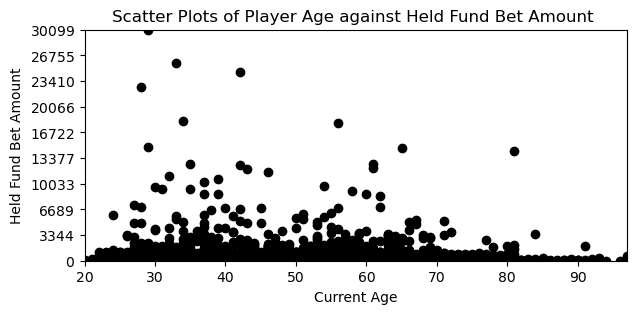

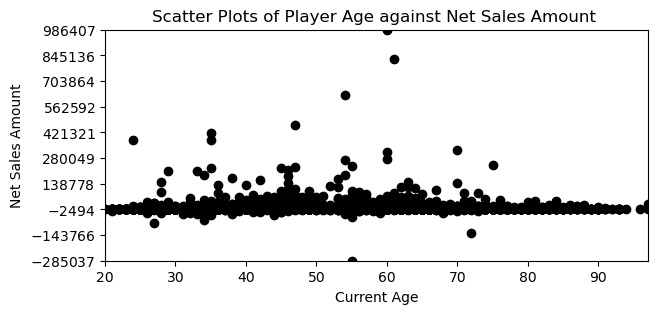

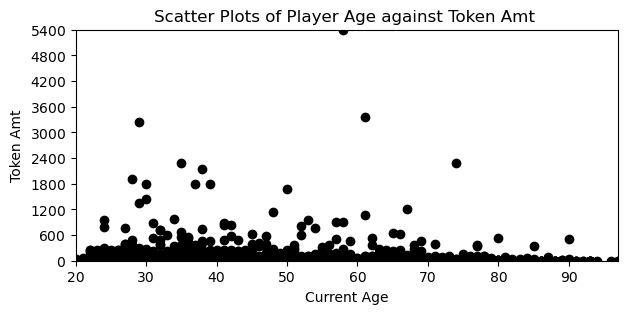

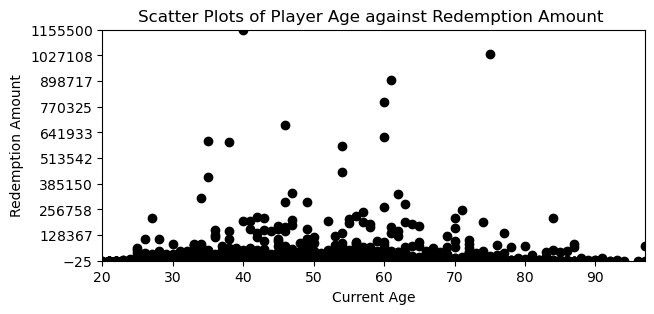

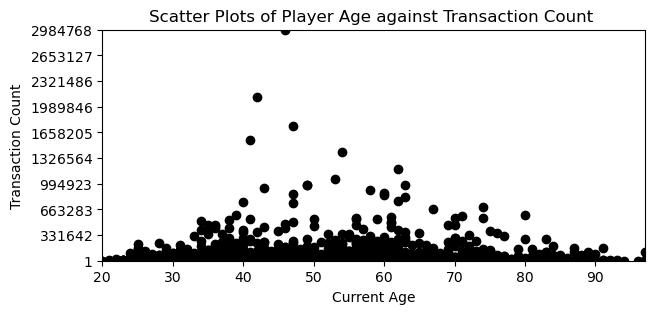

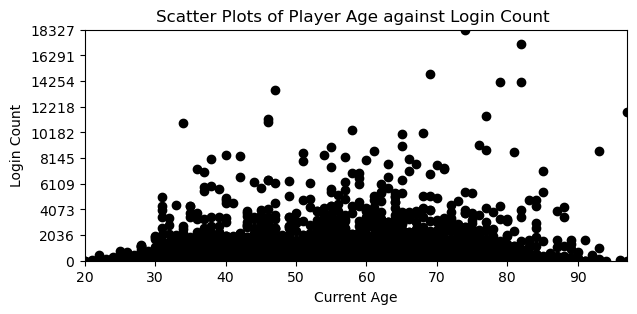

In [15]:
for col_index in range(0,df_cluster_target.shape[1]):
    current_column = df_cluster_target.columns[col_index]
    
    if current_column == 'Current Age' or current_column in exclude_columns:
        continue

    current_column = df_cluster_target.iloc[:,col_index]
    plt.figure(figsize=(7,3))
    plt.scatter(df_cluster_target.iloc[:,10], current_column, c='black')
    plt.xlabel('Current Age')
    plt.ylabel(f'{df_cluster_target.columns[col_index]}')
    plt.title(f'Scatter Plots of Player Age against {df_cluster_target.columns[col_index]} ')
    plt.ylim(current_column.min(), current_column.max())
    plt.xlim(df_cluster_target.iloc[:,10].min(), df_cluster_target.iloc[:,10].max())
    
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().ticklabel_format(style='plain', axis='y')

    plt.yticks(ticks=np.linspace(current_column.min(), current_column.max(), num=10))

    
    plt.show()

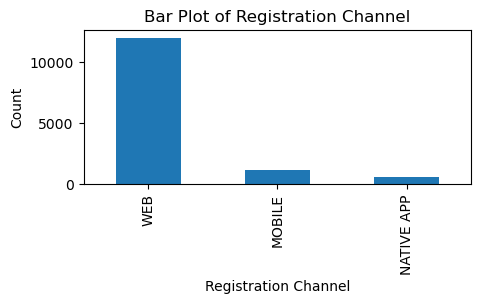

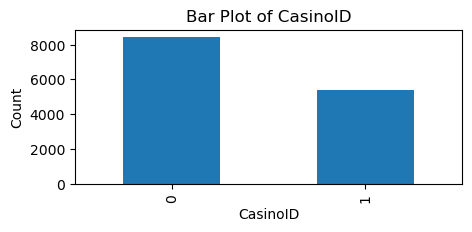

In [16]:
categorical_columns = ['Registration Channel', 'CasinoID']

for column_name in categorical_columns:
    plt.figure(figsize=(5, 2))
    df_cluster_target[column_name].value_counts().plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {column_name}')
    plt.show()

In [17]:
from sklearn.cluster import KMeans
from numpy.random.mtrand import RandomState

In [18]:
df_cluster_target['Registration Channel'].fillna('Missing', inplace=True)

In [19]:
rows_with_nan = df_cluster_target[df_cluster_target.isna().any(axis=1)]

In [20]:
rows_with_nan.head()

,Bet Amount,Paid Amount,Promo Amount,Held Fund Bet Amount,Net Sales Amount,Token Amt,Redemption Amount,Transaction Count,Login Count,Registration Channel,Current Age,CasinoID


In [47]:
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#encoded_features = encoder.fit_transform(df_cluster_target[['Registration Channel']])
#encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Registration Channel']))
#df_cluster_target = pd.concat([df_cluster_target.drop(columns=['Registration Channel']),encoded_df], axis=1)

In [21]:
df_cluster_target = pd.get_dummies(df_cluster_target, columns=['Registration Channel'], prefix='',prefix_sep='')

# Convert boolean values (True/False) to integers (1/0)
df_cluster_target = df_cluster_target.astype(int)

In [22]:
df_cluster_target.head()

,Bet Amount,Paid Amount,Promo Amount,Held Fund Bet Amount,Net Sales Amount,Token Amt,Redemption Amount,Transaction Count,Login Count,Current Age,CasinoID,MOBILE,NATIVE APP,WEB
24,31834,29358,136,2339,5529,80,136,3266,1,29,1,0,0,1
35,82,41,40,0,0,0,80,32,25,39,1,0,0,1
38,165,108,57,0,10,0,171,204,460,45,1,1,0,0
39,14157,13712,350,94,2020,0,280,4916,0,35,0,0,0,1
43,24,4,20,0,0,0,20,8,2,64,0,0,0,1


In [23]:
df_cluster_target.columns

Index(['Bet Amount', 'Paid Amount', 'Promo Amount', 'Held Fund Bet Amount',
       'Net Sales Amount', 'Token Amt', 'Redemption Amount',
       'Transaction Count', 'Login Count', 'Current Age', 'CasinoID', 'MOBILE',
       'NATIVE APP', 'WEB'],
      dtype='object')

In [24]:
df_cluster_target[['CasinoID', 'MOBILE', 
                   'NATIVE APP', 
                   'WEB']] = df_cluster_target[['CasinoID', 'MOBILE', 'NATIVE APP', 'WEB']].astype('category')

In [25]:
df_cluster_target.dtypes

Bet Amount                 int32
Paid Amount                int32
Promo Amount               int32
Held Fund Bet Amount       int32
Net Sales Amount           int32
Token Amt                  int32
Redemption Amount          int32
Transaction Count          int32
Login Count                int32
Current Age                int32
CasinoID                category
MOBILE                  category
NATIVE APP              category
WEB                     category
dtype: object

In [26]:
df_cluster_target_array = df_cluster_target.to_numpy()

In [27]:
#imputer = SimpleImputer(strategy='mean')
#df_cluster_target_array = imputer.fit_transform(df_cluster_target_array)

In [28]:
df_cluster_target_array.shape

(13810, 14)

In [29]:
scaler = RobustScaler()
df_cluster_target_array = scaler.fit_transform(df_cluster_target_array)

In [30]:
df_cluster_target_array

array([[ 2.18718259e+01,  2.50370053e+01,  1.76666667e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.77146312e-02, -4.70588235e-02,  1.66666667e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.03644844e-02,  1.02673797e-02,  4.50000000e-01, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       ...,
       [-8.84435999e-02, -7.18716578e-02,  1.66666667e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.46242874e-02, -7.18716578e-02,  5.00000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.03644844e-01, -7.35828877e-02, -1.66666667e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [31]:
k_means = KMeans()
para_grid = {
    'n_clusters': [3,4],
    'n_init': [10,15,20,25]
}

grid_search = GridSearchCV(k_means, para_grid,cv=10)
grid_search.fit(df_cluster_target_array)

GridSearchCV(cv=10, estimator=KMeans(),
             param_grid={'n_clusters': [3, 4], 'n_init': [10, 15, 20, 25]})

In [32]:
np.set_printoptions(precision=2, suppress=True) 

In [33]:
grid_search.best_estimator_

KMeans(n_clusters=4, n_init=15)

In [34]:
best_k_means = grid_search.best_estimator_

In [35]:
original_scale= scaler.inverse_transform(best_k_means.cluster_centers_)

In [36]:
df_cluster_centers =pd.DataFrame(original_scale, columns=df_cluster_target.columns )

In [37]:
pd.options.display.float_format = '{:.2f}'.format

In [38]:
df_cluster_centers

,Bet Amount,Paid Amount,Promo Amount,Held Fund Bet Amount,Net Sales Amount,Token Amt,Redemption Amount,Transaction Count,Login Count,Current Age,CasinoID,MOBILE,NATIVE APP,WEB
0,10624.82,10365.97,149.79,108.90,608.30,10.65,1079.14,5511.94,259.19,47.02,0.38,0.09,0.04,0.87
1,12521433.00,12474152.60,47133.20,147.20,663416.20,0.00,510463.40,856142.40,515.20,51.40,0.40,0.00,-0.00,1.00
2,4139589.75,4112881.63,25774.63,933.25,222998.56,0.00,389888.94,529537.44,1748.38,50.50,0.75,0.06,0.00,0.94
3,1057567.92,1050252.08,6958.99,356.70,52036.79,61.93,91901.37,281703.57,654.88,52.31,0.86,0.11,0.01,0.88


In [39]:
cluster_assignments = best_k_means.labels_

In [40]:
unique_clusters, cluster_counts = np.unique(cluster_assignments, return_counts=True)
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f'Cluster {cluster}: {count} players')

Cluster 0: 13644 players
Cluster 1: 5 players
Cluster 2: 16 players
Cluster 3: 145 players


## Cluster Evaluation

In [41]:
best_k_means.inertia_

656909445.3743825

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [43]:
silhouette_score(df_cluster_target_array,best_k_means.labels_)

0.944151891539132

C:\Users\DHuang\AppData\Local\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Redemption Amount')

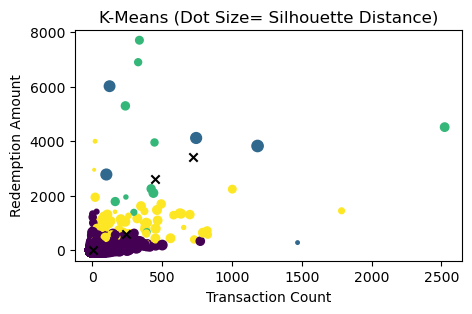

In [60]:
sample_silhouette_values = silhouette_samples(df_cluster_target_array,best_k_means.labels_)
sizes = 100 * sample_silhouette_values

plt.figure(figsize=(5,3));

plt.scatter(df_cluster_target_array[:,7], df_cluster_target_array[:,6], s=sizes, c= best_k_means.labels_)
plt.scatter(best_k_means.cluster_centers_[:,7], best_k_means.cluster_centers_[:,6], marker='x', c='black', label='cluster centers' )

plt.title("K-Means (Dot Size= Silhouette Distance)")
plt.xlabel(df_cluster_target.columns[7])
plt.ylabel(df_cluster_target.columns[6])


Text(0, 0.5, 'Promo Amount')

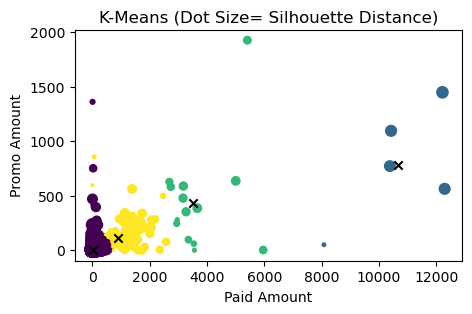

In [56]:
plt.figure(figsize=(5,3));

plt.scatter(df_cluster_target_array[:,1], df_cluster_target_array[:,2], s=sizes, c= best_k_means.labels_)
plt.scatter(best_k_means.cluster_centers_[:,1], best_k_means.cluster_centers_[:,2], marker='x', c='black', label='cluster centers' )

plt.title("K-Means (Dot Size= Silhouette Distance)")
plt.xlabel(df_cluster_target.columns[1])
plt.ylabel(df_cluster_target.columns[2])

Text(0, 0.5, 'Redemption Amount')

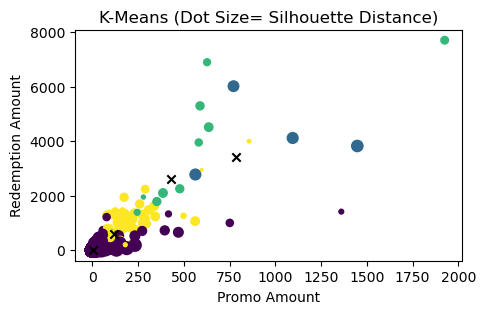

In [59]:
plt.figure(figsize=(5,3));

plt.scatter(df_cluster_target_array[:,2], df_cluster_target_array[:,6], s=sizes, c= best_k_means.labels_)
plt.scatter(best_k_means.cluster_centers_[:,2], best_k_means.cluster_centers_[:,6], marker='x', c='black', label='cluster centers' )

plt.title("K-Means (Dot Size= Silhouette Distance)")
plt.xlabel(df_cluster_target.columns[2])
plt.ylabel(df_cluster_target.columns[6])

Text(0, 0.5, 'Transaction Count')

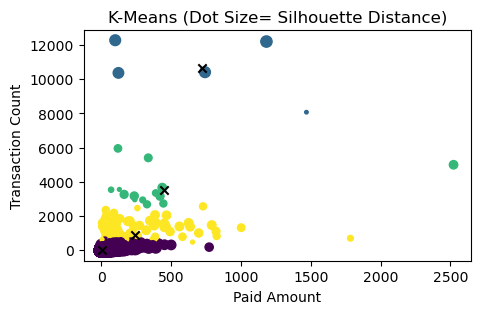

In [68]:
plt.figure(figsize=(5,3));

plt.scatter(df_cluster_target_array[:,7], df_cluster_target_array[:,1], s=sizes, c= best_k_means.labels_)
plt.scatter(best_k_means.cluster_centers_[:,7], best_k_means.cluster_centers_[:,1], marker='x', c='black', label='cluster centers' )

plt.title("K-Means (Dot Size= Silhouette Distance)")
plt.xlabel(df_cluster_target.columns[1])
plt.ylabel(df_cluster_target.columns[7])